5. Analyse the Data Using Visualisations

In [1]:
#importing tools

import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

#Importing second dataset - HR analytics of attrition rates in various job roles

df = pd.read_csv("HR_Employee_Attrition_2021.csv")

In [2]:
#checking to see if all rows and columns have been read in

df.shape

(1470, 36)

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Current Year'],
      dtype='object')

In [4]:
#showing column names

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
import seaborn as sns

5.1. Pivot Table

In [6]:
#pivot table showing aggregated statistics of 'MonthlyIncome' and 'YearsInCurrentRole' columns with 'Department' as the index

df.groupby(['Department']).agg({'MonthlyIncome': ['mean'], 'YearsInCurrentRole': ['mean']})

,MonthlyIncome,YearsInCurrentRole
,mean,mean
Department,,
Human Resources,6654.507937,3.539683
Research & Development,6281.252862,4.155047
Sales,6959.172646,4.486547


5.2. Scatter Plots

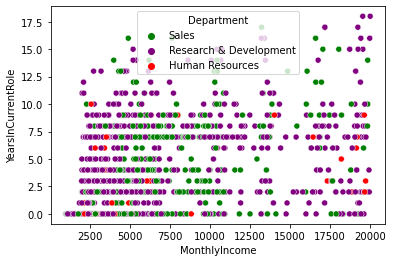

In [7]:
# relationship between 'MonthlyIncome' and 'YearsInCurrentRole' with hue as 'Department'

g = sns.scatterplot(x=df['MonthlyIncome'], y=df['YearsInCurrentRole'], hue="Department", data=df, palette=['green', 'purple', 'red'])


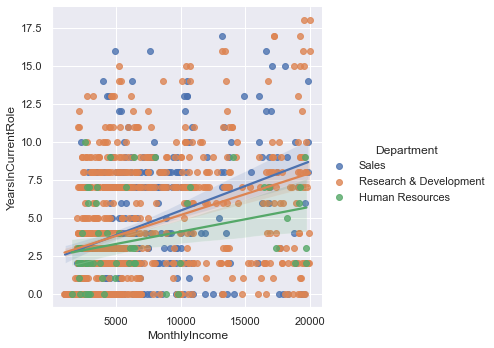

In [8]:
#adding best fit line for each job category - linear model plot

sns.set(color_codes=True)
g = sns.lmplot(x="MonthlyIncome", y="YearsInCurrentRole", data=df, hue="Department")

Analysis of lmplot

All three categories show positive correlation. As monthly income increases so does years in current role. It is diffcult to make any judgements on the strength of correlation with this current graph so we will take a look at two categoryies of department and analyse them more closely.

In [9]:
#analysing just the rows on the dataset that apply to the sales category

df = df.loc[df['Department'] == 'Sales']

In [10]:
df.shape

(446, 36)

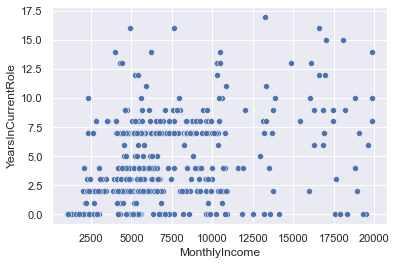

In [11]:
g = sns.scatterplot(x=df['MonthlyIncome'], y=df['YearsInCurrentRole'], data=df)

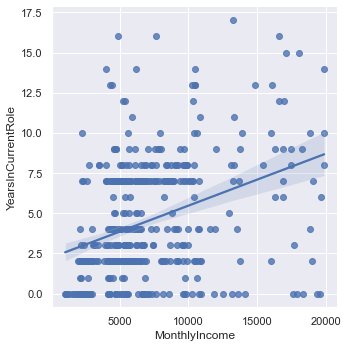

In [12]:
# linear model for sales category of department columnsns.set(color_codes=True)
g = sns.lmplot(x="MonthlyIncome", y="YearsInCurrentRole", data=df)

Analysing the lmplot above

A positive correlation can be seen in the graph. You can see by the best fit line that if you move to the right along the monthly income scale the years in current role value goes up. if the regression line was flat, which corresponds to a coefficient of zero. For this scenario, the years in role value wouldnt change no matter how far along the line you move. We can say that there is a positive correlation between monthly income and years in role

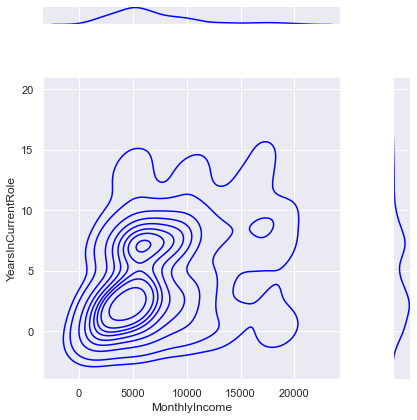

In [13]:
sns.jointplot(x=df['MonthlyIncome'], y=df['YearsInCurrentRole'], kind='kde', color="blue", space=3)

In [14]:
# getting a new dataframe

df1 = pd.read_csv("HR_Employee_Attrition_2021.csv")

In [15]:
df1.shape

(1470, 36)

In [16]:
#focussing on research and sales category of department column
df1 = df1.loc[df1['Department'] == 'Research & Development']

In [17]:
df1.shape

(961, 36)

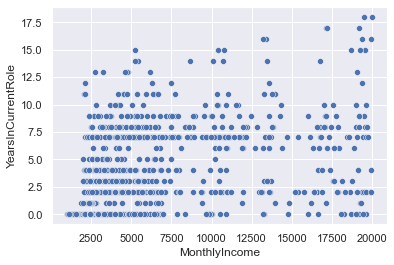

In [18]:
#scatter plot of R&D  jobs, monthly income and years in role

g = sns.scatterplot(x=df1['MonthlyIncome'], y=df1['YearsInCurrentRole'], data=df1)

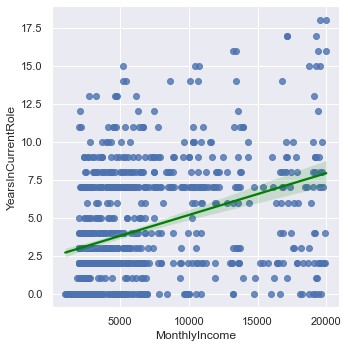

In [19]:
# with best fit line

sns.set(color_codes=True)
g = sns.lmplot(x="MonthlyIncome", y="YearsInCurrentRole", line_kws ={'color': 'green'}, data=df1)

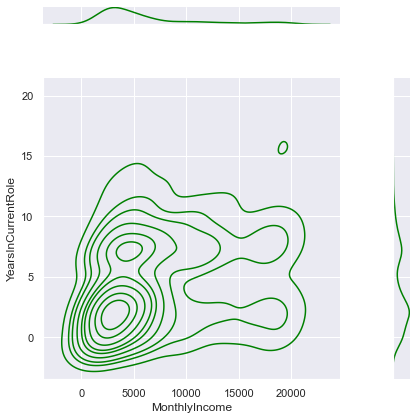

In [20]:
sns.jointplot(x=df1['MonthlyIncome'], y=df1['YearsInCurrentRole'], kind='kde', color="green", space=3)

Merging our two datasets together to give a basis for further work:

In [21]:
#merging two csv's on current year column

data1 = pd.read_csv('HR_Employee_Attrition_2021.csv')
data2 = pd.read_csv('2021_data.csv')
output = pd.merge(data1, data2, 
                   on='Current Year', 
                   how='right')

In [22]:
#checking to see if merge worked 

output.shape

(596820, 107)

In [23]:
# reviewing columns 

output.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber',
       ...
       'Creditors(CUR)', 'Equity(CUR)', 'Employees(CUR)', 'Previous Year',
       'Fixed Assets(PREV)', 'Net Fixed Assets(PREV)', 'Current Assets(PREV)',
       'Creditors(PREV)', 'Equity(PREV)', 'Employees(PREV)'],
      dtype='object', length=107)

5.3. Demonstration of Drawing Conclusions from Visualisations

In the scatter graphs above all three categories show positive correlation between monthly income and length of time in current role. It can be seen from the graphs that most datapoints cluster close to the best fit line in the bottom left hand side of the graph showing strong correlation between low pay and less time spent in a role. As we move accross the monthly income scale the data points get further from the best fit line suggesting that the correlation is less strong. It is diffcult to make any judgements on the strength of correlation with these current graphs but they represent a good starting point for anyone taking over this topic.

Our expert in chapter one suggested that one reason for high turnover of staff was the lack of opportunity for career progression. Our analysis shows that there is also a correlation between lower monthly income and length of time spent in a role. The correlation may not be strong enough to make any reccomendations to a company at this time but it does warrant further investigation.  

5.4. Demonstration of Problem Solving

see file chapter 4 - companies house data

5.5. Conclusions & Further Work

The plan set out in chapter 3 of this report was to provide some analysis and visualisation as a basis for someone to continue further investigations. Chapters 4 & 5 have provided a broad statistical analysis in companies related to the company we woulld seek to make reccomendations to. i have provided some boxplots, histograms, pivot tables and scatterplots to give some visualisation to the data. With the limited time and data available it is too early to make any judgements or reccomendations but hopefully a sound basis for further investigation has been supplied.


5.5.1. Effectiveness of Analysis Techniques, Tools, and Guides

The scattergraphs and linear models provided in chapter givr give a good visual overview of the data in the found dataset.

5.5.2. Further Work

Focus on testing more correlation between income and length of time spent in a role. If a dataset can be found which more closely relates to our industry the same analysis techniques can be used

I have meged the two available datasets together and would reccomend this as a place to practice more analysis and visualisation before moving further afield. 

5.6. Appendix